In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('../input/train.csv',index_col=0)
test = pd.read_csv('../input/test.csv',index_col=0)

In [3]:
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000BECBEC4A8>,
      dtype=object)

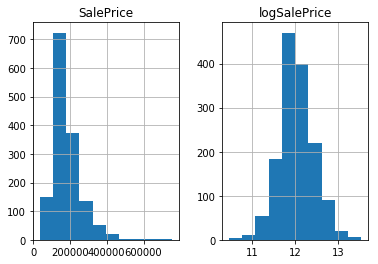

In [5]:
%matplotlib inline
price = pd.DataFrame({'SalePrice':train.SalePrice,'logSalePrice':np.log1p(train.SalePrice)})
price.hist()

In [6]:
train_y = np.log1p(train.SalePrice)

In [7]:
train.shape

(1460, 80)

In [8]:
train.pop('SalePrice')

Id
1       208500
2       181500
3       223500
4       140000
5       250000
6       143000
7       307000
8       200000
9       129900
10      118000
11      129500
12      345000
13      144000
14      279500
15      157000
16      132000
17      149000
18       90000
19      159000
20      139000
21      325300
22      139400
23      230000
24      129900
25      154000
26      256300
27      134800
28      306000
29      207500
30       68500
         ...  
1431    192140
1432    143750
1433     64500
1434    186500
1435    160000
1436    174000
1437    120500
1438    394617
1439    149700
1440    197000
1441    191000
1442    149300
1443    310000
1444    121000
1445    179600
1446    129000
1447    157900
1448    240000
1449    112000
1450     92000
1451    136000
1452    287090
1453    145000
1454     84500
1455    185000
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [9]:
train.shape
test.shape

(1459, 79)

In [10]:
df = pd.concat((train,test),axis=0)


In [11]:
df.shape

(2919, 79)

In [12]:
df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal


In [13]:
df['MSSubClass']=df['MSSubClass'].astype(str)
df['MSSubClass'].head(5)

Id
1    60
2    20
3    60
4    70
5    60
Name: MSSubClass, dtype: object

In [14]:
df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [15]:
df_dum = pd.get_dummies(df)
df_dum.head(1)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
df_dum.isnull().sum().sort_values(ascending=False).head(10)
df_dum.MasVnrArea.head(5)

Id
1    196.0
2      0.0
3    162.0
4      0.0
5    350.0
Name: MasVnrArea, dtype: float64

In [17]:
df_dum = df_dum.fillna(df_dum.mean())

这里出问题了，前边独热编码的时候需要用别的变量来表示，否则后面找连续变量的时候就找不到了，都不是object类型了

In [18]:
col_num = df.columns[df.dtypes!='object']
col_num

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [19]:
col_mean = df_dum[col_num].mean()
print(col_mean)
col_std = df_dum[col_num].std()
print(col_std)
df_dum[col_num] = (df_dum[col_num]-col_mean)/col_std

LotFrontage         69.305795
LotArea          10168.114080
OverallQual          6.089072
OverallCond          5.564577
YearBuilt         1971.312778
YearRemodAdd      1984.264474
MasVnrArea         102.201312
BsmtFinSF1         441.423235
BsmtFinSF2          49.582248
BsmtUnfSF          560.772104
TotalBsmtSF       1051.777587
1stFlrSF          1159.581706
2ndFlrSF           336.483727
LowQualFinSF         4.694416
GrLivArea         1500.759849
BsmtFullBath         0.429894
BsmtHalfBath         0.061364
FullBath             1.568003
HalfBath             0.380267
BedroomAbvGr         2.860226
KitchenAbvGr         1.044536
TotRmsAbvGrd         6.451524
Fireplaces           0.597122
GarageYrBlt       1978.113406
GarageCars           1.766621
GarageArea         472.874572
WoodDeckSF          93.709832
OpenPorchSF         47.486811
EnclosedPorch       23.098321
3SsnPorch            2.602261
ScreenPorch         16.062350
PoolArea             2.251799
MiscVal             50.825968
MoSold    

In [20]:
train_dum = df_dum.loc[train.index]
test_dum = df_dum.loc[test.index]
print(train_dum.shape,test_dum.shape)
print(train.shape,test.shape)

(1460, 303) (1459, 303)
(1460, 79) (1459, 79)


In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [22]:
x_train =  train_dum.values
y_train = train_y.values

In [94]:
alphas = np.logspace(-3,2,50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha=alpha)
    test_score = -cross_val_score(clf,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
    test_scores.append(test_score.mean())
    

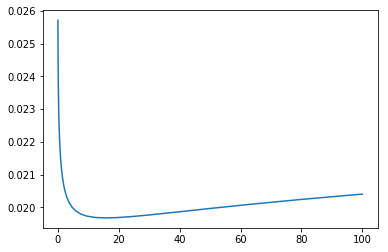

In [95]:
import matplotlib.pyplot as plt
plt.plot(alphas,test_scores)

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
max_features = [.1,.2,.4,.6,.8,.9]
test_scores = []
for max_feature in max_features:
    clt = RandomForestRegressor(n_estimators=200,max_features=max_feature)
    test_score = -cross_val_score(clt,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
    test_scores.append(test_score.mean())

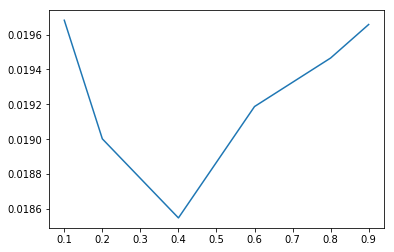

In [99]:
plt.plot(max_features,test_scores)

In [35]:
clf1 = Ridge(alpha=17)
clf2 = RandomForestRegressor(n_estimators=200,max_features=0.4)
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [102]:
y1 = np.expm1(clf1.predict(test_dum.values))
y2 = np.expm1(clf2.predict(test_dum.values))
ym = (y1+y2)/2

In [103]:
submit = pd.DataFrame({'Id':test_dum.index,'SalePrice':ym})
submit.head(5)

,Id,SalePrice
0,1461,119398.733754
1,1462,150760.804166
2,1463,175212.999633
3,1464,189583.412298
4,1465,194491.622763


In [104]:
submit.to_csv('submit1.csv')

In [23]:
from sklearn.ensemble import BaggingRegressor

In [24]:
params = [1,10,15,20,25,30,35,40]
ridge = Ridge(alpha=17)
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param,base_estimator=ridge)
    test_score = -cross_val_score(clf,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
    test_scores.append(test_score.mean())

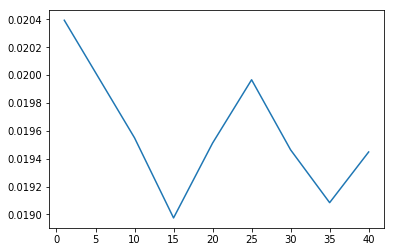

In [26]:
import matplotlib.pyplot as plt
plt.plot(params,test_scores)

In [27]:
from sklearn.ensemble import AdaBoostRegressor

In [28]:
params = [1,10,15,20,25,30,35,40,45,50]
ridge = Ridge(alpha=17)
test_scores = []
for param in params:
    clf = AdaBoostRegressor(n_estimators=param,base_estimator=ridge)
    test_score = -cross_val_score(clf,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
    test_scores.append(test_score.mean())

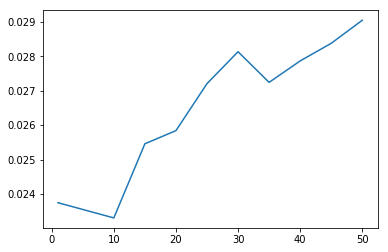

In [29]:
plt.plot(params,test_scores)

In [30]:
from xgboost import XGBRegressor

In [31]:
params = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf =XGBRegressor(max_depth=param)
    test_score = -cross_val_score(clf,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
    test_scores.append(test_score.mean())

[23:21:56] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:21:57] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:21:57] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:21:57] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:21:58] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:21:58] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:21:59] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linea

[23:22:47] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:22:49] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:22:50] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:22:52] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:22:53] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


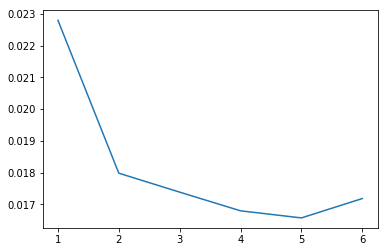

In [32]:
plt.plot(params,test_scores)

In [38]:
clf3 = XGBRegressor(max_depth=param)
clf3.fit(x_train,y_train)

[23:27:47] WARNING: d:\build\xgboost\xgboost-0.90.git\src\objective\regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [39]:
y1 = np.expm1(clf1.predict(test_dum.values))
y2 = np.expm1(clf2.predict(test_dum.values))
y3 = np.expm1(clf3.predict(test_dum.values))
ym = (y1+y2+y3)/3

In [45]:
submit = pd.DataFrame({'Id':test_dum.index,'SalePrice':ym})
submit = submit.set_index('Id')
submit.head(5)

,SalePrice
Id,
1461,121813.188483
1462,154562.483278
1463,178363.721916
1464,187464.752040
1465,193209.475224


In [46]:
submit.to_csv('submit2.csv')

In [42]:
len(submit)

1459